In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint as sp_randint
from sklearn import preprocessing
from xgboost import XGBRegressor

import extract_location_features
import preprocessing

In [2]:
# extract_location_features.main()
# preprocessing.main()

In [3]:
df = pd.read_csv('data/train_preprocessed.csv', sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price_index                 431732 non-null  float64
 1   year                        431732 non-null  int64  
 2   month                       431732 non-null  int64  
 3   num_rooms                   431732 non-null  int64  
 4   is_executive                431732 non-null  bool   
 5   is_multi_gen                431732 non-null  bool   
 6   storey_range_avg            431732 non-null  float64
 7   is_low_floor                431732 non-null  int64  
 8   floor_area_sqm              431732 non-null  float64
 9   lease_commence_date         431732 non-null  int64  
 10  latitude                    431732 non-null  float64
 11  longitude                   431732 non-null  float64
 12  elevation                   431732 non-null  float64
 13  town          

In [5]:
df.head()

,price_index,year,month,num_rooms,is_executive,is_multi_gen,storey_range_avg,is_low_floor,floor_area_sqm,lease_commence_date,...,pop10,pop11,pop12,pop13,pop14,pop15,pop16,pop17,pop18,resale_price
0,70.6,2001,8,4,False,False,2.0,1,118.0,1989,...,1260.0,1310.0,1120.0,710.0,350.0,240.0,180.0,140.0,15250.0,209700.0
1,137.0,2014,10,5,False,False,11.0,0,110.0,2003,...,12150.0,12200.0,9440.0,6220.0,3000.0,2350.0,1560.0,1220.0,138490.0,402300.0
2,133.9,2020,9,5,False,False,2.0,1,112.0,2004,...,1390.0,1490.0,1120.0,670.0,300.0,210.0,160.0,100.0,16540.0,351000.0
3,75.8,2000,10,3,False,False,8.0,0,67.0,1980,...,340.0,390.0,290.0,220.0,130.0,90.0,40.0,60.0,4130.0,151200.0
4,148.6,2013,1,3,False,False,8.0,0,73.0,1985,...,2150.0,2000.0,2230.0,2250.0,1220.0,1020.0,590.0,510.0,28760.0,318600.0


In [6]:
# convert string to categorical variables
df['town'] = df['town'].astype('category')
df['block'] = df['block'].astype('category')
df['street_name'] = df['street_name'].astype('category')
df['flat_model'] = df['flat_model'].astype('category')
df['subzone'] = df['subzone'].astype('category')
df['planning_area'] = df['planning_area'].astype('category') # 32 planning_areas
df['region'] = df['region'].astype('category') # 5 regions
df['nearest_center'] = df['nearest_center'].astype('category')
df['nearest_markets'] = df['nearest_markets'].astype('category')
df['nearest_pri_school'] = df['nearest_pri_school'].astype('category')
df['nearest_sec_school'] = df['nearest_sec_school'].astype('category')
df['nearest_mall'] = df['nearest_mall'].astype('category')
df['nearest_train_station'] = df['nearest_train_station'].astype('category')

In [7]:
x_num_cols = ['price_index', 'year', 'month', 'num_rooms', 'is_executive', 'is_multi_gen', 'storey_range_avg', 'is_low_floor', 'floor_area_sqm', 'lease_commence_date', 'latitude', 'cbd_dist', 'longitude', 'n_center_dist', 'nearest_markets_dist', 'nearest_pri_school_dist', 'nearest_sec_school_dist', 'nearest_mall_dist', 'nearest_train_station_dist']
x_cat_cols = ['flat_model', 'planning_area', 'nearest_center', 'nearest_train_station']
# x_cat_cols = ['flat_model', 'planning_area', 'nearest_center', 'nearest_markets', 'nearest_pri_school', 'nearest_sec_school', 'nearest_mall', 'nearest_train_station']
y_col = 'resale_price'

In [8]:
encoder = OneHotEncoder(drop='first').fit(df[x_cat_cols])
X_cat_encoded = pd.DataFrame(encoder.transform(df[x_cat_cols]).toarray(), columns=encoder.get_feature_names_out())

In [9]:
X_encoded = pd.concat([df[x_num_cols], X_cat_encoded], axis=1)

In [10]:
scaler = StandardScaler().fit(X_encoded)
X_scaled = pd.DataFrame(scaler.transform(X_encoded), columns=X_encoded.columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[y_col], test_size=0.2)

In [12]:
results = {}

# Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
results['linear_regression'] = res
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

MSE: 1371053839.68, r2: 0.92


# Random Forest

In [14]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
results['random_forest'] = res
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

MSE: 320462476.64, r2: 0.98


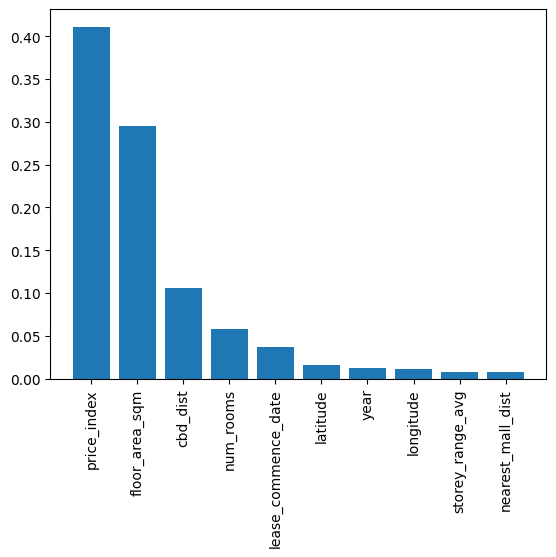

In [15]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_
# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
# Create tick labels 
labels = np.array(X_train.columns)[sorted_index]
plt.bar(range(10), importances[sorted_index][:10], tick_label=labels[:10])
# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

# Gradient Boosting

In [16]:
# TODO: no parameter tuning yet
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
results['gradient_boosting'] = res
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

MSE: 1001912325.19, r2: 0.94


# AdaBoost

In [17]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
results['ada_boost'] = res
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

MSE: 5441418919.17, r2: 0.68


# XGBoost

In [18]:
# I was told this is a regressor popular in industry...
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
results['xgboost'] = res
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

MSE: 411505998.45, r2: 0.98


In [19]:
np.round(pd.DataFrame.from_dict(results, orient='index', columns=['MSE', 'r2']), 2)

,MSE,r2
linear_regression,1.371054e+09,0.92
random_forest,3.204625e+08,0.98
gradient_boosting,1.001912e+09,0.94
ada_boost,5.441419e+09,0.68
xgboost,4.115060e+08,0.98


# Parameter Tuning

In [ ]:
# params = {
#     "n_estimators": [100, 500, 1000], # default is 100
#     "learning_rate": [0.01, 0.1, 0.2], # default is 0.1
#     "max_depth": [3, 6, 9], # default is 6
#     "subsample": [0.8, 1], # default is 1
#     "colsample_bytree": [0.8, 1], # default is 1
# }
# best param so far is 2000
params = {
    "n_estimators": [1000, 2000],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 6, 9]
}
xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=18)
grid_search.fit(X_train, y_train)
grid_search.best_params_

# Prediction

In [ ]:
test = pd.read_csv('data/test_preprocessed.csv', sep='\t')

In [ ]:
test.head()

In [ ]:
test['town'] = test['town'].astype('category')
test['block'] = test['block'].astype('category')
test['street_name'] = test['street_name'].astype('category')
test['flat_model'] = test['flat_model'].astype('category')
test['subzone'] = test['subzone'].astype('category')
test['planning_area'] = test['planning_area'].astype('category')
test['region'] = test['region'].astype('category')
test['nearest_center'] = test['nearest_center'].astype('category')
# test['nearest_markets'] = test['nearest_markets'].astype('category')
# test['nearest_pri_school'] = test['nearest_pri_school'].astype('category')
# test['nearest_sec_school'] = test['nearest_sec_school'].astype('category')
# test['nearest_mall'] = test['nearest_mall'].astype('category')
test['nearest_train_station'] = test['nearest_train_station'].astype('category')

In [ ]:
X_cat_encoded_final = pd.DataFrame(encoder.transform(test[x_cat_cols]).toarray(), columns=encoder.get_feature_names_out())
X_encoded_final = pd.concat([test[x_num_cols], X_cat_encoded_final], axis=1)
X_scaled_final = pd.DataFrame(scaler.transform(X_encoded_final), columns=X_encoded_final.columns)

In [ ]:
y_final = grid_search.predict(X_scaled_final)
# y_final = xgb_model.predict(X_scaled_final)

In [ ]:
y_final

In [ ]:
pd.DataFrame({'Id':test.index, 'Predicted':y_final}).to_csv('prediction.csv', index=False)